# Function/method (we'll see) that maps some matrix to some other matrix with specified dimensions

## The point is to make pictures a particular number of pixels, such that they can be read by a neural network

## **UNDER CONSTRUCTION **

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matrix_mapper.matrix_mapper import matrix_mapper

We want to map a matrix $\bf{X} \to \bf{x}$.
The dimensions of $\bf{X}$ and $\bf{x}$ are
$N \times M \to n \times m$, respectively, with $n<N$ and $m<M$.

We need something like

$$
    x_{k, l} = \frac{nm}{NM}\sum_{\substack{i\in \mathcal{N}_k,\\ j\in \mathcal{M}_l}}X_{i, j},
$$

where $\mathcal{N}_k$ and $\mathcal{M}_l$ are sets that contain the points in $\bf{X}$ that we want mapped to $x_{k, l}$.

How might we construct these sets?

We want there to be $N/n$ sets
$\mathcal{N}_\nu, \nu=1, 2, \ldots, N/n$,
and $M/m$ sets
$\mathcal{M}_\mu, \mu=1, 2, \ldots, M/n$.
Off the bat, we cannot expect $N/n$ and $M/m$ to be integers; the easiest (and I'd say an acceptable) solution is to throw away rows and columns on the edges of $\bf{X}$ until $N/n$ and $M/m$ become integers, i.e.
$$
N\mod n = 0,
$$
$$
M\mod m = 0.
$$

Suppose $\tilde{\bf{X}}$ is our original matrix with dimension $\tilde{N}\times\tilde{M}$. Suppose
$\tilde{N}\mod n = a$ and
$\tilde{M}\mod m = b$;
then we throw away $a$ rows and $b$ columns along the edges of $\tilde{\bf{X}}$ (as symetrically as we can on the left/right/top/bottom), and call the resulting matrix $\bf{X}$. $\bf{X}$ now has dimension $N\times M$ with $N=\tilde{N}-a$ and $\tilde{M}-b$, and by construction,
$ N \mod n = 0$, and
$ M \mod m = 0$,
as desired.

Now all I have to do is to program it up, and that is for another day :)

## Test of function
I've just started the process of cropping the original matrix. Next comes the actual shrinking.

In [2]:
image = Image.open('test-picture.jpeg')
X = np.asarray(image)
X = X.mean(axis=2)

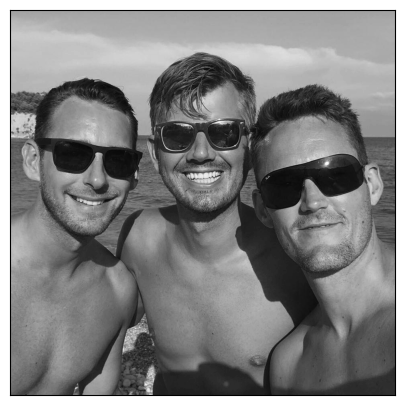

In [3]:
plt.figure(figsize=(5, 5))
plt.imshow(X, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
x = matrix_mapper(X, 50, 50)

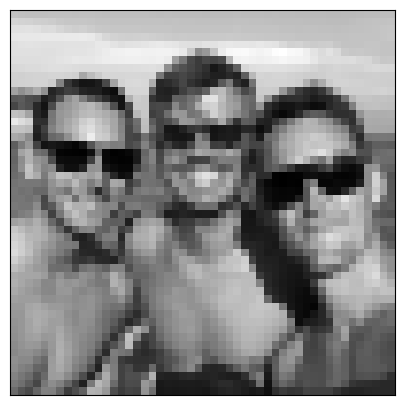

In [5]:
plt.figure(figsize=(5, 5))
plt.imshow(x, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()